# Feature Engineering(Dhaka-2017 Dataset) 

In [159]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Dhaka\\real_2017.csv")

In [161]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,-,-,-,-,-,-,-,-,427,EU
1,2,20.3,27.5,16.4,1014,72,2.6,0,-,373,EU
2,3,22.5,27.2,15.9,1013.5,66,3.2,2.2,5.4,353,EU
3,4,23.6,27.2,16.7,1012.5,53,2.9,3.1,5.4,235,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339,EU


In [162]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   D         365 non-null    object
 1   T         226 non-null    object
 2   TM        226 non-null    object
 3   Tm        226 non-null    object
 4   SLP       226 non-null    object
 5   H         226 non-null    object
 6   VV        226 non-null    object
 7   V         226 non-null    object
 8   VM        226 non-null    object
 9   AQI       365 non-null    int64 
 10  Category  365 non-null    object
dtypes: int64(1), object(10)
memory usage: 31.5+ KB


In [163]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,-,-,-,-,-,-,-,-,427,EU
1,2,20.3,27.5,16.4,1014,72,2.6,0,-,373,EU
2,3,22.5,27.2,15.9,1013.5,66,3.2,2.2,5.4,353,EU
3,4,23.6,27.2,16.7,1012.5,53,2.9,3.1,5.4,235,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,-,-,-,-,-,-,-,-,323,EU
361,28,19.1,24.6,16.2,1014.2,84,1.9,1.9,3.5,303,EU
362,29,21.7,27,15.3,1014.2,70,2.9,0,-,297,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,VU


In [164]:
aqi_data.isnull().sum()

D             0
T           139
TM          139
Tm          139
SLP         139
H           139
VV          139
V           139
VM          139
AQI           0
Category      0
dtype: int64

In [165]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427,EU
1,2,20.3,27.5,16.4,1014,72,2.6,0,NaN,373,EU
2,3,22.5,27.2,15.9,1013.5,66,3.2,2.2,5.4,353,EU
3,4,23.6,27.2,16.7,1012.5,53,2.9,3.1,5.4,235,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,EU
361,28,19.1,24.6,16.2,1014.2,84,1.9,1.9,3.5,303,EU
362,29,21.7,27,15.3,1014.2,70,2.9,0,NaN,297,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,VU


In [166]:
aqi.isnull().sum()

D             0
T           208
TM          208
Tm          208
SLP         208
H           208
VV          208
V           208
VM          250
AQI           0
Category      0
dtype: int64

<AxesSubplot:>

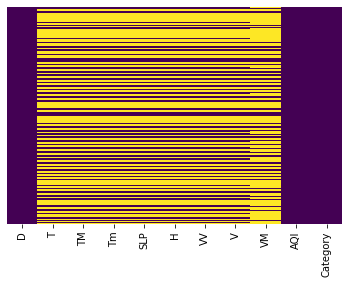

In [167]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Missing value Handling 
                   
                   1. Delete row data.
                   2. Create new model.
                   3. Statistical Method(Mean,Median,Mode)
                   
                   But here we use Statistical Method(Mean)
       

### 
T = Average Temperature (°C) , TM = Maximum temperature (°C), 

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa), 

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


## Convert object type as float type

In [168]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1(January)

Find monthly mean

In [169]:
df1 = aqi.iloc[0:31,0:11]
df1

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427,EU
1,2,20.3,27.5,16.4,1014.0,72.0,2.6,0.0,NaN,373,EU
2,3,22.5,27.2,15.9,1013.5,66.0,3.2,2.2,5.4,353,EU
3,4,23.6,27.2,16.7,1012.5,53.0,2.9,3.1,5.4,235,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339,EU
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335,EU
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277,VU
7,8,20.8,27.0,13.8,1011.6,59.0,3.5,0.9,3.5,318,EU
8,9,22.9,27.3,15.4,1010.7,44.0,3.7,0.9,3.5,334,EU
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262,VU


In [170]:
df1.isnull().sum()

D            0
T           22
TM          22
Tm          22
SLP         22
H           22
VV          22
V           22
VM          25
AQI          0
Category     0
dtype: int64

In [171]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())

In [172]:
df1 = df1.round(2)

In [173]:
df1

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.83,27.27,15.69,1013.18,60.56,3.32,1.2,4.45,427,EU
1,2,20.30,27.50,16.40,1014.00,72.00,2.60,0.0,4.45,373,EU
2,3,22.50,27.20,15.90,1013.50,66.00,3.20,2.2,5.40,353,EU
3,4,23.60,27.20,16.70,1012.50,53.00,2.90,3.1,5.40,235,VU
4,5,21.83,27.27,15.69,1013.18,60.56,3.32,1.2,4.45,339,EU
5,6,21.83,27.27,15.69,1013.18,60.56,3.32,1.2,4.45,335,EU
6,7,21.83,27.27,15.69,1013.18,60.56,3.32,1.2,4.45,277,VU
7,8,20.80,27.00,13.80,1011.60,59.00,3.50,0.9,3.50,318,EU
8,9,22.90,27.30,15.40,1010.70,44.00,3.70,0.9,3.50,334,EU
9,10,21.83,27.27,15.69,1013.18,60.56,3.32,1.2,4.45,262,VU


# Month-2 (February)

In [174]:
df2 = aqi.iloc[31:59,0:11]
df2

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,20.1,27.4,15.0,1014.9,60.0,3.5,1.3,3.5,312,EU
32,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284,VU
33,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280,VU
34,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238,VU
35,5,26.1,32.0,16.0,1012.0,37.0,4.3,1.3,3.5,212,VU
36,6,23.8,31.0,19.4,1010.3,54.0,3.7,0.0,NaN,477,EU
37,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148,C
38,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,U
39,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,VU
40,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397,EU


In [175]:
df2.isnull().sum()

D            0
T           23
TM          23
Tm          23
SLP         23
H           23
VV          23
V           23
VM          25
AQI          0
Category     0
dtype: int64

In [176]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())

In [177]:
df2 = df2.round(2)

In [178]:
df2

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,20.10,27.40,15.00,1014.90,60.0,3.50,1.3,3.5,312,EU
32,2,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,284,VU
33,3,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,280,VU
34,4,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,238,VU
35,5,26.10,32.00,16.00,1012.00,37.0,4.30,1.3,3.5,212,VU
36,6,23.80,31.00,19.40,1010.30,54.0,3.70,0.0,3.5,477,EU
37,7,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,148,C
38,8,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,175,U
39,9,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,245,VU
40,10,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,397,EU


In [179]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-3(March)

In [180]:
df3 = aqi.iloc[59:90,0:11]
df3

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,26.7,31.5,17.9,1011.3,37.0,3.9,0.9,3.5,333,EU
60,2,27.2,33.2,18.0,1009.2,47.0,3.7,1.9,3.5,283,VU
61,3,25.9,33.4,21.4,1007.1,67.0,4.0,0.9,3.5,168,U
62,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161,U
63,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121,C
64,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,M
65,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183,U
66,8,24.3,30.1,20.2,1008.7,63.0,3.9,1.9,3.5,193,U
67,9,24.1,27.8,18.8,1007.6,72.0,4.3,1.9,3.5,159,U
68,10,24.6,32.0,19.8,1007.0,81.0,3.2,8.9,37.0,157,U


In [181]:
df3.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          18
AQI          0
Category     0
dtype: int64

In [182]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())

In [183]:
df3= df3.round(2)
df3

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,26.70,31.5,17.90,1011.30,37.0,3.90,0.90,3.50,333,EU
60,2,27.20,33.2,18.00,1009.20,47.0,3.70,1.90,3.50,283,VU
61,3,25.90,33.4,21.40,1007.10,67.0,4.00,0.90,3.50,168,U
62,4,25.35,30.8,19.75,1009.54,62.0,4.18,1.99,6.54,161,U
63,5,25.35,30.8,19.75,1009.54,62.0,4.18,1.99,6.54,121,C
64,6,25.35,30.8,19.75,1009.54,62.0,4.18,1.99,6.54,99,M
65,7,25.35,30.8,19.75,1009.54,62.0,4.18,1.99,6.54,183,U
66,8,24.30,30.1,20.20,1008.70,63.0,3.90,1.90,3.50,193,U
67,9,24.10,27.8,18.80,1007.60,72.0,4.30,1.90,3.50,159,U
68,10,24.60,32.0,19.80,1007.00,81.0,3.20,8.90,37.00,157,U


# Month-4(April)

In [184]:
df4 = aqi.iloc[90:120,0:11]
df4

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,29.3,33.8,26.0,1006.4,71.0,5.1,6.3,9.4,84,M
91,2,28.9,32.4,26.5,1006.0,71.0,4.7,10.2,16.5,78,M
92,3,28.0,33.4,24.2,1006.6,74.0,4.8,5.2,7.6,66,M
93,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,M
94,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,M
95,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152,U
96,7,29.4,34.0,23.0,1006.5,75.0,4.8,2.6,5.4,112,C
97,8,29.8,34.0,26.0,1007.6,76.0,4.5,1.9,5.4,117,C
98,9,29.3,33.7,26.4,1006.0,77.0,4.8,0.0,NaN,124,C
99,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,C


In [185]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          17
AQI          0
Category     0
dtype: int64

In [186]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())

In [187]:
df4 = df4.round(2)
df4

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,29.30,33.80,26.00,1006.40,71.00,5.10,6.30,9.40,84,M
91,2,28.90,32.40,26.50,1006.00,71.00,4.70,10.20,16.50,78,M
92,3,28.00,33.40,24.20,1006.60,74.00,4.80,5.20,7.60,66,M
93,4,28.83,33.44,23.83,1006.09,70.93,4.76,4.33,10.82,93,M
94,5,28.83,33.44,23.83,1006.09,70.93,4.76,4.33,10.82,93,M
95,6,28.83,33.44,23.83,1006.09,70.93,4.76,4.33,10.82,152,U
96,7,29.40,34.00,23.00,1006.50,75.00,4.80,2.60,5.40,112,C
97,8,29.80,34.00,26.00,1007.60,76.00,4.50,1.90,5.40,117,C
98,9,29.30,33.70,26.40,1006.00,77.00,4.80,0.00,10.82,124,C
99,10,28.83,33.44,23.83,1006.09,70.93,4.76,4.33,10.82,135,C


In [188]:
df4.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-5 (May)

In [189]:
df5 = aqi.iloc[120:151,0:11]
df5

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,26.8,33.0,22.0,1009.9,74.0,4.7,5.6,22.2,95,M
121,2,27.8,33.0,21.0,1010.1,67.0,4.7,0.0,NaN,91,M
122,3,30.3,35.1,25.8,1008.9,72.0,5.0,0.9,3.5,112,C
123,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132,C
124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,C
125,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,M
126,7,30.3,34.6,24.5,1008.4,71.0,5.1,5.0,9.4,86,M
127,8,31.4,35.0,27.8,1007.1,67.0,5.3,2.0,5.4,79,M
128,9,26.2,31.7,24.0,1008.0,76.0,5.1,6.9,25.9,106,C
129,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,U


In [190]:
df5.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          18
AQI          0
Category     0
dtype: int64

In [191]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())

In [192]:
df5 = df5.round(2)
df5

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,26.80,33.00,22.00,1009.90,74.0,4.70,5.60,22.20,95,M
121,2,27.80,33.00,21.00,1010.10,67.0,4.70,0.00,9.32,91,M
122,3,30.30,35.10,25.80,1008.90,72.0,5.00,0.90,3.50,112,C
123,4,29.62,34.44,25.48,1005.12,72.5,5.04,2.33,9.32,132,C
124,5,29.62,34.44,25.48,1005.12,72.5,5.04,2.33,9.32,120,C
125,6,29.62,34.44,25.48,1005.12,72.5,5.04,2.33,9.32,96,M
126,7,30.30,34.60,24.50,1008.40,71.0,5.10,5.00,9.40,86,M
127,8,31.40,35.00,27.80,1007.10,67.0,5.30,2.00,5.40,79,M
128,9,26.20,31.70,24.00,1008.00,76.0,5.10,6.90,25.90,106,C
129,10,29.62,34.44,25.48,1005.12,72.5,5.04,2.33,9.32,162,U


In [193]:
df5.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-6 (June)

In [194]:
df6 = aqi.iloc[151:181,0:11]
df6

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,26.5,28.0,24.8,1002.4,90.0,4.7,2.0,5.4,78,M
152,2,28.0,32.2,24.6,1003.2,80.0,5.1,5.9,14.8,54,M
153,3,32.1,35.0,23.5,1000.9,75.0,5.3,3.9,5.4,91,M
154,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,M
155,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113,C
156,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,C
157,7,31.1,35.5,27.7,1002.7,77.0,5.5,1.1,3.5,141,C
158,8,29.5,36.1,24.8,1001.3,75.0,5.0,0.6,3.5,116,C
159,9,29.6,31.5,27.2,1001.1,81.0,5.0,1.1,5.4,136,C
160,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,M


In [195]:
df6.isnull().sum()

D            0
T           18
TM          18
Tm          18
SLP         18
H           18
VV          18
V           18
VM          19
AQI          0
Category     0
dtype: int64

In [196]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())

In [197]:
df6 = df6.round(2)
df6

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,26.50,28.00,24.80,1002.40,90.00,4.70,2.00,5.40,78,M
152,2,28.00,32.20,24.60,1003.20,80.00,5.10,5.90,14.80,54,M
153,3,32.10,35.00,23.50,1000.90,75.00,5.30,3.90,5.40,91,M
154,4,29.59,33.17,26.49,1001.32,78.75,5.13,1.89,5.56,74,M
155,5,29.59,33.17,26.49,1001.32,78.75,5.13,1.89,5.56,113,C
156,6,29.59,33.17,26.49,1001.32,78.75,5.13,1.89,5.56,112,C
157,7,31.10,35.50,27.70,1002.70,77.00,5.50,1.10,3.50,141,C
158,8,29.50,36.10,24.80,1001.30,75.00,5.00,0.60,3.50,116,C
159,9,29.60,31.50,27.20,1001.10,81.00,5.00,1.10,5.40,136,C
160,10,29.59,33.17,26.49,1001.32,78.75,5.13,1.89,5.56,85,M


In [198]:
df6.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-7 (July)

In [199]:
df7 = aqi.iloc[181:212,0:11]
df7

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,29.0,31.8,27.5,998.5,83.0,4.5,2.0,5.4,26,G
182,2,28.6,32.2,26.9,998.2,89.0,3.9,3.5,5.4,32,G
183,3,28.1,30.2,26.5,998.3,88.0,3.7,1.9,5.4,43,G
184,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,M
185,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,M
186,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,M
187,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,M
188,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,M
189,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,M
190,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,M


In [200]:
df7.isnull().sum()

D            0
T           19
TM          19
Tm          19
SLP         19
H           19
VV          19
V           19
VM          21
AQI          0
Category     0
dtype: int64

In [201]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())

In [202]:
df7 = df7.round(2)
df7

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,29.00,31.8,27.50,998.50,83.00,4.50,2.00,5.4,26,G
182,2,28.60,32.2,26.90,998.20,89.00,3.90,3.50,5.4,32,G
183,3,28.10,30.2,26.50,998.30,88.00,3.70,1.90,5.4,43,G
184,4,29.61,32.7,26.77,1000.39,79.58,4.63,1.38,4.1,65,M
185,5,29.61,32.7,26.77,1000.39,79.58,4.63,1.38,4.1,53,M
186,6,29.61,32.7,26.77,1000.39,79.58,4.63,1.38,4.1,78,M
187,7,29.61,32.7,26.77,1000.39,79.58,4.63,1.38,4.1,59,M
188,8,29.61,32.7,26.77,1000.39,79.58,4.63,1.38,4.1,59,M
189,9,29.61,32.7,26.77,1000.39,79.58,4.63,1.38,4.1,63,M
190,10,29.61,32.7,26.77,1000.39,79.58,4.63,1.38,4.1,80,M


In [203]:
df7.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-8 (August)

In [204]:
df8 = aqi.iloc[212:243,0:11]
df8

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,30.4,33.6,28.2,1001.5,78.0,4.5,1.1,3.5,92,M
213,2,28.8,33.4,27.2,1000.6,89.0,4.0,0.0,NaN,101,C
214,3,29.0,33.4,26.7,998.0,86.0,4.3,0.6,3.5,115,C
215,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,C
216,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,M
217,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,M
218,7,29.4,32.4,26.0,1004.1,78.0,5.1,0.7,3.5,53,M
219,8,30.8,34.2,28.4,1003.4,73.0,5.0,1.1,3.5,67,M
220,9,29.3,33.8,28.0,1003.4,81.0,5.1,2.8,5.4,68,M
221,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,M


In [205]:
df8.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          20
AQI          0
Category     0
dtype: int64

In [206]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())

In [207]:
df8 = df8.round(2)
df8

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,30.40,33.60,28.20,1001.50,78.00,4.50,1.10,3.50,92,M
213,2,28.80,33.40,27.20,1000.60,89.00,4.00,0.00,4.38,101,C
214,3,29.00,33.40,26.70,998.00,86.00,4.30,0.60,3.50,115,C
215,4,29.28,32.88,26.83,1002.49,81.75,4.71,0.99,4.38,118,C
216,5,29.28,32.88,26.83,1002.49,81.75,4.71,0.99,4.38,87,M
217,6,29.28,32.88,26.83,1002.49,81.75,4.71,0.99,4.38,73,M
218,7,29.40,32.40,26.00,1004.10,78.00,5.10,0.70,3.50,53,M
219,8,30.80,34.20,28.40,1003.40,73.00,5.00,1.10,3.50,67,M
220,9,29.30,33.80,28.00,1003.40,81.00,5.10,2.80,5.40,68,M
221,10,29.28,32.88,26.83,1002.49,81.75,4.71,0.99,4.38,58,M


In [208]:
df8.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-9 (September)

In [209]:
df9 = aqi.iloc[243:273,0:11]
df9

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,28.7,30.8,25.6,1004.2,85.0,4.8,0.0,NaN,53,M
244,2,29.2,33.0,27.0,1002.1,77.0,5.1,1.1,3.5,54,M
245,3,28.5,33.9,26.6,1003.6,84.0,4.5,1.5,3.5,72,M
246,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,M
247,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,M
248,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127,C
249,7,30.4,34.8,28.0,1005.7,76.0,4.5,1.1,3.5,80,M
250,8,30.3,34.7,28.0,1006.0,76.0,4.8,2.8,5.4,52,M
251,9,29.7,32.4,27.8,1005.4,77.0,4.5,2.0,5.4,46,G
252,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,M


In [210]:
df9.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          21
AQI          0
Category     0
dtype: int64

In [211]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())

In [212]:
df9 = df9.round(2)
df9

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,28.70,30.80,25.60,1004.2,85.00,4.80,0.00,4.59,53,M
244,2,29.20,33.00,27.00,1002.1,77.00,5.10,1.10,3.50,54,M
245,3,28.50,33.90,26.60,1003.6,84.00,4.50,1.50,3.50,72,M
246,4,29.24,32.74,27.05,1004.6,82.13,4.54,1.05,4.59,80,M
247,5,29.24,32.74,27.05,1004.6,82.13,4.54,1.05,4.59,80,M
248,6,29.24,32.74,27.05,1004.6,82.13,4.54,1.05,4.59,127,C
249,7,30.40,34.80,28.00,1005.7,76.00,4.50,1.10,3.50,80,M
250,8,30.30,34.70,28.00,1006.0,76.00,4.80,2.80,5.40,52,M
251,9,29.70,32.40,27.80,1005.4,77.00,4.50,2.00,5.40,46,G
252,10,29.24,32.74,27.05,1004.6,82.13,4.54,1.05,4.59,70,M


In [213]:
df9.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-10 (October)

In [214]:
df10 = aqi.iloc[273:304,0:11]
df10

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,27.2,32.5,25.5,1006.8,92.0,3.9,0.6,3.5,105,C
274,2,29.0,33.2,25.4,1005.9,79.0,5.0,1.1,3.5,109,C
275,3,30.1,35.0,26.0,1006.2,74.0,4.7,0.6,3.5,86,M
276,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,C
277,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,C
278,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,C
279,7,28.1,32.5,26.5,1006.5,81.0,4.2,1.5,3.5,62,M
280,8,28.3,31.9,26.0,1006.0,77.0,5.3,4.6,5.4,57,M
281,9,27.1,29.0,25.8,1006.3,85.0,4.0,2.4,7.6,59,M
282,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,M


In [215]:
df10.isnull().sum()

D            0
T           19
TM          19
Tm          19
SLP         19
H           19
VV          19
V           19
VM          22
AQI          0
Category     0
dtype: int64

In [216]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())

In [217]:
df10 = df10.round(2)
df10

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,27.20,32.5,25.50,1006.80,92.0,3.90,0.60,3.50,105,C
274,2,29.00,33.2,25.40,1005.90,79.0,5.00,1.10,3.50,109,C
275,3,30.10,35.0,26.00,1006.20,74.0,4.70,0.60,3.50,86,M
276,4,27.99,31.9,25.04,1007.07,77.5,4.46,1.45,5.49,118,C
277,5,27.99,31.9,25.04,1007.07,77.5,4.46,1.45,5.49,126,C
278,6,27.99,31.9,25.04,1007.07,77.5,4.46,1.45,5.49,142,C
279,7,28.10,32.5,26.50,1006.50,81.0,4.20,1.50,3.50,62,M
280,8,28.30,31.9,26.00,1006.00,77.0,5.30,4.60,5.40,57,M
281,9,27.10,29.0,25.80,1006.30,85.0,4.00,2.40,7.60,59,M
282,10,27.99,31.9,25.04,1007.07,77.5,4.46,1.45,5.49,95,M


In [218]:
df10.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-11 (November)

In [219]:
df11 = aqi.iloc[304:334,0:11]
df11

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,25.1,30.5,20.0,1013.1,69.0,4.0,1.9,3.5,127,C
305,2,26.2,31.1,21.0,1011.0,66.0,4.0,0.9,5.4,154,U
306,3,24.6,31.8,20.4,1011.3,72.0,4.2,1.3,7.6,157,U
307,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,C
308,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,C
309,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156,U
310,7,28.0,32.4,22.0,1011.2,55.0,4.8,0.9,3.5,148,C
311,8,25.7,32.0,21.6,1010.6,64.0,4.7,1.1,3.5,153,U
312,9,25.7,31.2,21.2,1010.4,67.0,4.5,0.6,3.5,181,U
313,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147,C


In [220]:
df11.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          18
AQI          0
Category     0
dtype: int64

In [221]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())

In [222]:
df11 = df11.round(2)
df11

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,25.1,30.50,20.00,1013.10,69.00,4.00,1.90,3.50,127,C
305,2,26.2,31.10,21.00,1011.00,66.00,4.00,0.90,5.40,154,U
306,3,24.6,31.80,20.40,1011.30,72.00,4.20,1.30,7.60,157,U
307,4,25.1,30.38,20.48,1011.24,63.33,4.21,1.17,4.98,142,C
308,5,25.1,30.38,20.48,1011.24,63.33,4.21,1.17,4.98,144,C
309,6,25.1,30.38,20.48,1011.24,63.33,4.21,1.17,4.98,156,U
310,7,28.0,32.40,22.00,1011.20,55.00,4.80,0.90,3.50,148,C
311,8,25.7,32.00,21.60,1010.60,64.00,4.70,1.10,3.50,153,U
312,9,25.7,31.20,21.20,1010.40,67.00,4.50,0.60,3.50,181,U
313,10,25.1,30.38,20.48,1011.24,63.33,4.21,1.17,4.98,147,C


In [223]:
df11.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-12(December)

In [224]:
df12 = aqi.iloc[334:365,0:11]
df12

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.2,27.2,16.7,1013.1,72.0,3.1,0.0,NaN,270,VU
335,2,22.8,28.9,17.2,1012.9,63.0,3.9,1.1,5.4,284,VU
336,3,22.3,28.5,18.0,1012.5,56.0,4.2,0.0,NaN,214,VU
337,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,VU
338,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314,EU
339,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298,VU
340,7,23.4,28.6,16.5,1011.2,62.0,4.2,0.0,NaN,248,VU
341,8,22.7,25.6,20.4,1012.1,69.0,3.9,0.0,NaN,190,U
342,9,21.0,22.8,18.7,1011.9,94.0,3.2,2.0,7.6,109,C
343,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,M


In [225]:
df12.isnull().sum() 

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          26
AQI          0
Category     0
dtype: int64

In [226]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())

In [227]:
df12 = df12.round(2)
df12

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.20,27.20,16.70,1013.10,72.00,3.10,0.00,4.7,270,VU
335,2,22.80,28.90,17.20,1012.90,63.00,3.90,1.10,5.4,284,VU
336,3,22.30,28.50,18.00,1012.50,56.00,4.20,0.00,4.7,214,VU
337,4,22.01,26.83,17.13,1013.81,71.27,3.06,0.56,4.7,247,VU
338,5,22.01,26.83,17.13,1013.81,71.27,3.06,0.56,4.7,314,EU
339,6,22.01,26.83,17.13,1013.81,71.27,3.06,0.56,4.7,298,VU
340,7,23.40,28.60,16.50,1011.20,62.00,4.20,0.00,4.7,248,VU
341,8,22.70,25.60,20.40,1012.10,69.00,3.90,0.00,4.7,190,U
342,9,21.00,22.80,18.70,1011.90,94.00,3.20,2.00,7.6,109,C
343,10,22.01,26.83,17.13,1013.81,71.27,3.06,0.56,4.7,63,M


In [228]:
df12.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Add 12 months frame in a single frame

In [229]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.83,27.27,15.69,1013.18,60.56,3.32,1.20,4.45,427,EU
1,2,20.30,27.50,16.40,1014.00,72.00,2.60,0.00,4.45,373,EU
2,3,22.50,27.20,15.90,1013.50,66.00,3.20,2.20,5.40,353,EU
3,4,23.60,27.20,16.70,1012.50,53.00,2.90,3.10,5.40,235,VU
4,5,21.83,27.27,15.69,1013.18,60.56,3.32,1.20,4.45,339,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,22.01,26.83,17.13,1013.81,71.27,3.06,0.56,4.70,323,EU
361,28,19.10,24.60,16.20,1014.20,84.00,1.90,1.90,3.50,303,EU
362,29,21.70,27.00,15.30,1014.20,70.00,2.90,0.00,4.70,297,VU
363,30,22.01,26.83,17.13,1013.81,71.27,3.06,0.56,4.70,253,VU


In [230]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [231]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\DhakaNew\Data-2017.csv', index=False)